In [20]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('HR_comma_sep.csv')

In [22]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [24]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [25]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [35]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

/Users/macbookair/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


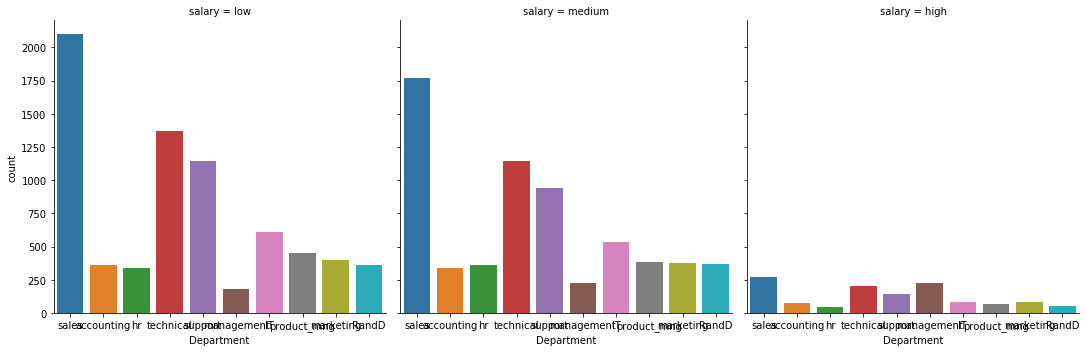

In [26]:
sns.factorplot('Department', col = 'salary', data=df, kind='count')

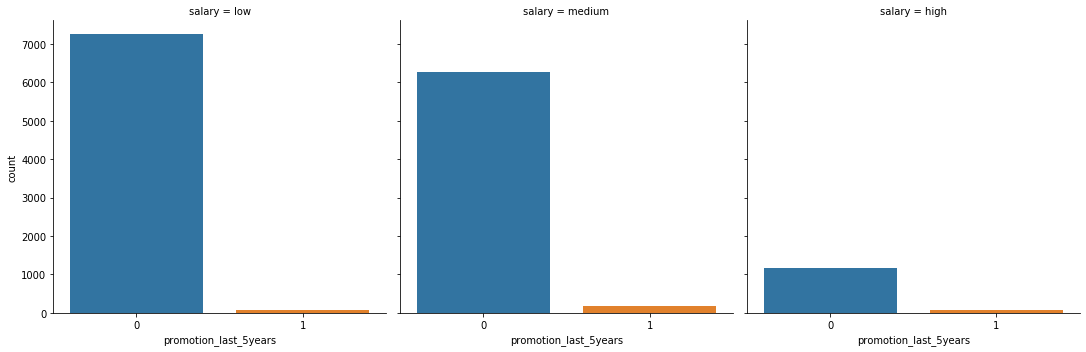

In [27]:
sns.factorplot('promotion_last_5years', col = 'salary', data=df, kind='count')

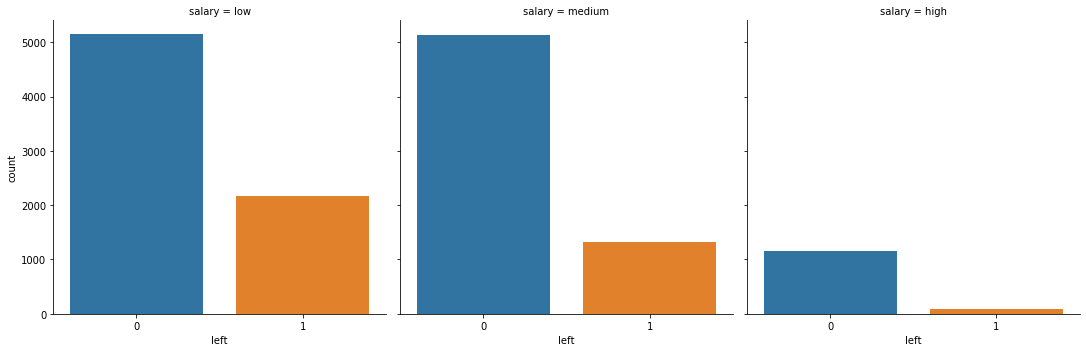

In [28]:
sns.factorplot('left', col = 'salary', data=df, kind='count')

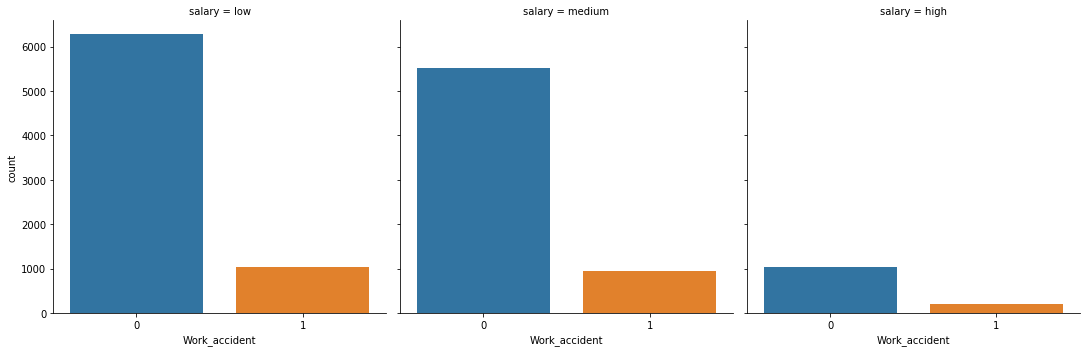

In [29]:
sns.factorplot('Work_accident', col = 'salary', data=df, kind='count')

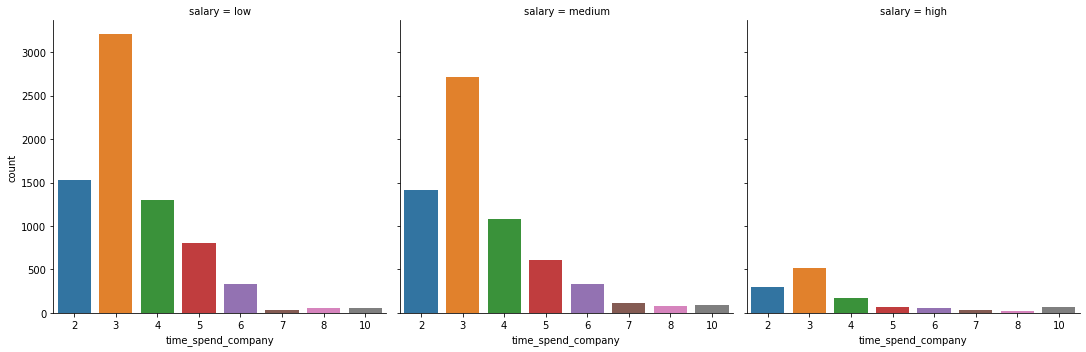

In [30]:
sns.factorplot('time_spend_company', col = 'salary', data=df, kind='count')

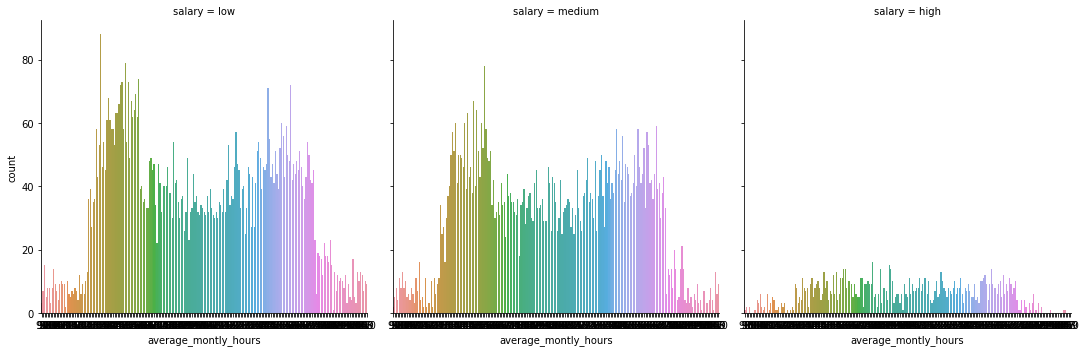

In [31]:
sns.factorplot('average_montly_hours', col = 'salary', data=df, kind='count')

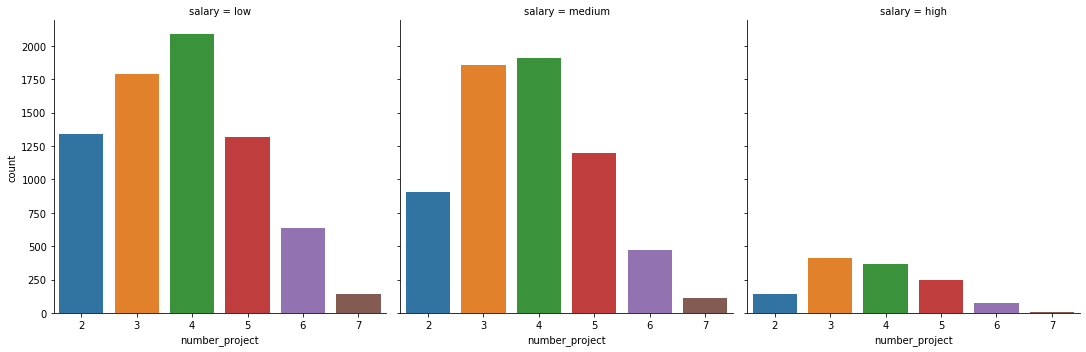

In [32]:
sns.factorplot('number_project', col = 'salary', data=df, kind='count')

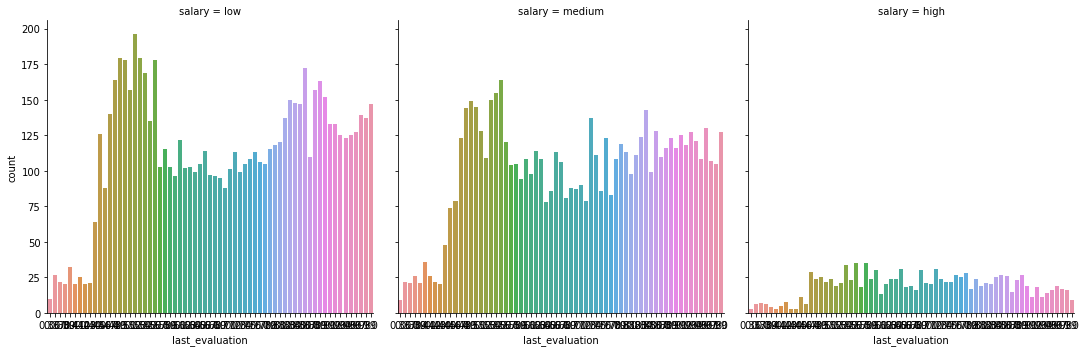

In [33]:
sns.factorplot('last_evaluation', col = 'salary', data=df, kind='count')

In [40]:
corr_matrix = df.corr()

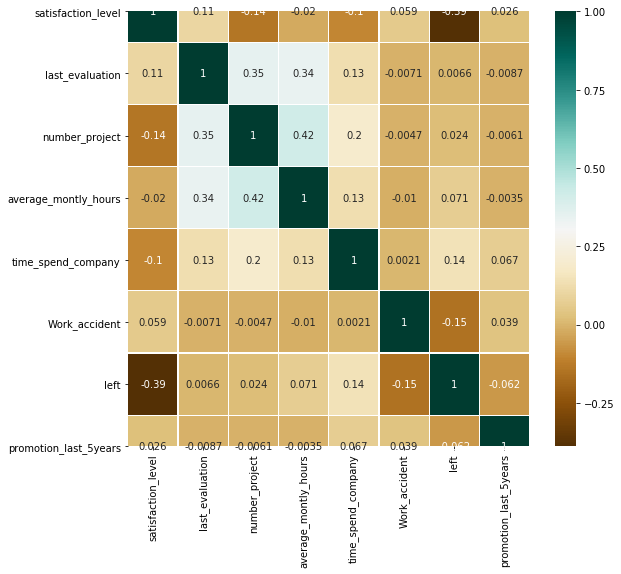

In [41]:
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix, cmap='BrBG', annot= True, linewidths= 0.2)

In [42]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [44]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [45]:
df['Department'] = df['Department'].map({'sales':0, 'technical':1, 'support':2, 'IT':3, 'product_mng':4, 'marketing':5, 'RandD':6, 'accounting':7, 'hr':8, 'management':9})
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})

In [48]:
corr_matrix = df[['Department', 'salary']].corr()

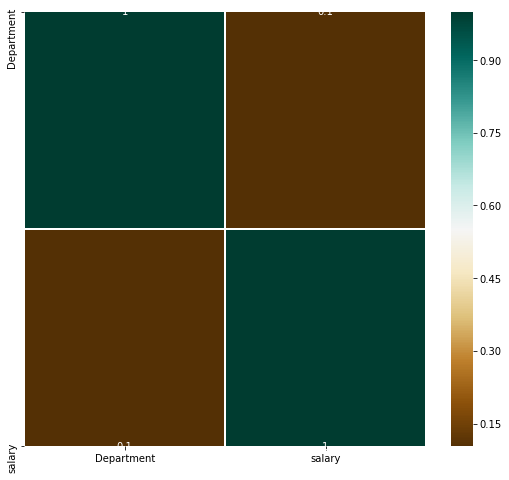

In [49]:
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix, cmap='BrBG', annot= True, linewidths= 0.2)

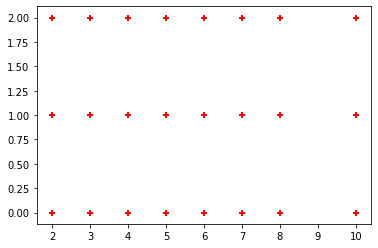

In [50]:
plt.scatter(df.time_spend_company, df.salary, marker='+', color='red')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df[['time_spend_company']],df.salary,train_size=0.9)

In [53]:
X_test

,time_spend_company
10386,3
10248,4
7623,3
406,5
9459,3
...,...
13838,10
6666,2
7404,3
5820,3


In [56]:
y_test

10386    0
10248    1
7623     0
406      0
9459     1
        ..
13838    1
6666     0
7404     1
5820     1
7102     1
Name: salary, Length: 1500, dtype: int64

In [57]:
X_train

,time_spend_company
3711,3
1556,3
6331,3
5946,2
5250,3
...,...
1413,5
5780,2
14432,3
7883,2


In [58]:
y_train

3711     0
1556     1
6331     0
5946     1
5250     1
        ..
1413     0
5780     1
14432    0
7883     2
7215     1
Name: salary, Length: 13499, dtype: int64

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [55]:
model.fit(X_train, y_train)

/Users/macbookair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macbookair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_predicted = model.predict(X_test)

In [60]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
model.predict_proba(X_test)

array([[0.49299705, 0.42737925, 0.0796237 ],
       [0.4783907 , 0.43484558, 0.08676372],
       [0.49299705, 0.42737925, 0.0796237 ],
       ...,
       [0.49299705, 0.42737925, 0.0796237 ],
       [0.49299705, 0.42737925, 0.0796237 ],
       [0.46349744, 0.44208103, 0.09442154]])

In [62]:
model.score(X_test,y_test)

0.5053333333333333